In [111]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [112]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [113]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [114]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

df['Cholesterol'] = df['Cholesterol'].fillna(df.groupby(['Age', 'MaxHR'])['Cholesterol'].transform('median'))
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

In [115]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

categorical_cols = X.select_dtypes(exclude='number').columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,True,False,True,False,True,False,False,False,True


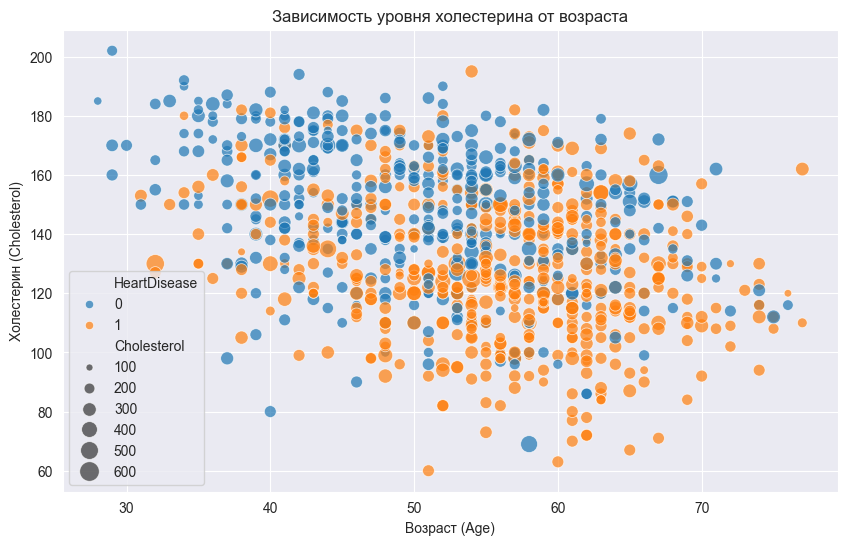

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='MaxHR',
    hue='HeartDisease',
    size='Cholesterol',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Зависимость уровня холестерина от возраста')
plt.xlabel('Возраст (Age)')
plt.ylabel('Холестерин (Cholesterol)')
plt.show()